In [1]:
!pip install datasets
!pip install transformers[torch] accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 

In [2]:
from datasets import load_dataset
ds = load_dataset('cats_vs_dogs')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/23410 [00:00<?, ? examples/s]

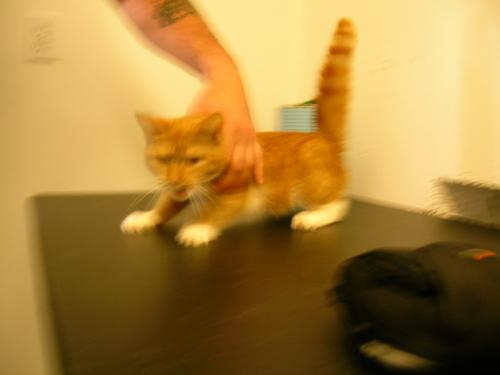

In [3]:
ds
entry = ds['train'][0]
entry
image = entry['image']
image

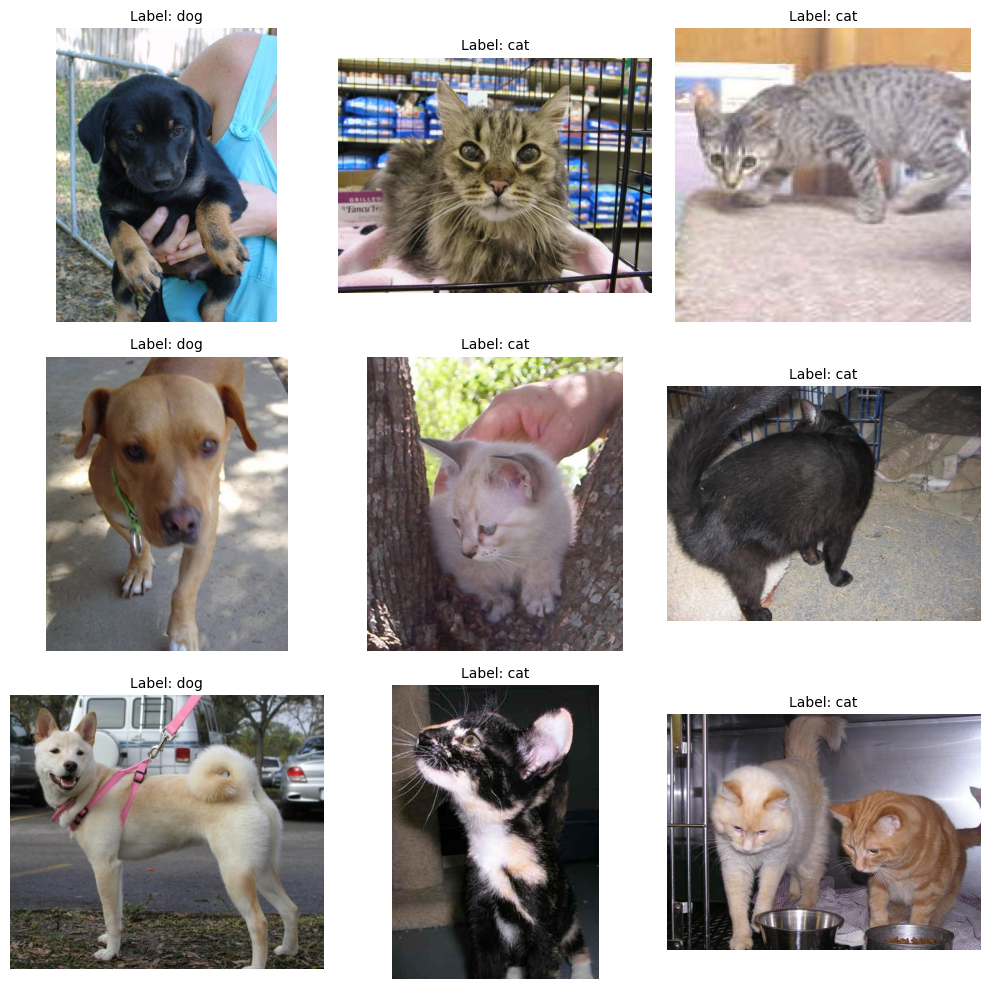

In [4]:
import random
from datasets import load_dataset
import matplotlib.pyplot as plt

# Function to display images with labels in a 3x3 grid
def display_random_images_with_labels(dataset, num_images=9, max_index=23410):
    # Generate random indices
    random_indices = random.sample(range(max_index), num_images)

    fig, axs = plt.subplots(3, 3, figsize=(10, 10))

    for idx, ax in zip(random_indices, axs.flatten()):
        entry = dataset['train'][idx]
        image = entry['image']
        label_id = entry['labels']
        label_name = dataset['train'].features['labels'].int2str(label_id)

        # Display the image
        ax.imshow(image)
        ax.set_title(f'Label: {label_name}', fontsize=10)
        ax.axis('off')

    # Adjusting layout
    plt.tight_layout()
    plt.show()

# Display 9 random images with their labels in a 3x3 grid
display_random_images_with_labels(ds, num_images=9, max_index=23410)

Using ViTFeature Extractor

In [5]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
vit_feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [6]:
vit_feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.5922,  0.6078,  0.6314,  ...,  0.9137,  0.8902,  0.8745],
          [ 0.5922,  0.6078,  0.6314,  ...,  0.9059,  0.8902,  0.8824],
          [ 0.5922,  0.6078,  0.6314,  ...,  0.9059,  0.8980,  0.8824],
          ...,
          [ 0.2078,  0.2157,  0.2235,  ..., -0.9765, -0.9765, -0.9765],
          [ 0.2000,  0.2000,  0.2078,  ..., -0.9843, -0.9843, -0.9843],
          [ 0.1843,  0.1922,  0.2000,  ..., -0.9922, -0.9922, -0.9922]],

         [[ 0.2863,  0.3020,  0.3255,  ...,  0.5922,  0.5843,  0.5686],
          [ 0.2863,  0.3020,  0.3255,  ...,  0.6078,  0.5843,  0.5765],
          [ 0.2863,  0.3020,  0.3255,  ...,  0.6078,  0.5922,  0.5765],
          ...,
          [-0.0353, -0.0275, -0.0196,  ..., -0.9765, -0.9765, -0.9765],
          [-0.0431, -0.0431, -0.0353,  ..., -0.9843, -0.9843, -0.9843],
          [-0.0588, -0.0510, -0.0431,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.3176, -0.3020, -0.2784,  ..., -0.0510, -0.0431, -0.0510],
          [-0

Processing the Data

In [8]:
def process_single_entry(entry):
    processed = vit_feature_extractor(entry['image'], return_tensors='pt')
    processed['labels'] = entry['labels']
    return processed

process_single_entry(ds['train'][0])

{'pixel_values': tensor([[[[ 0.5922,  0.6078,  0.6314,  ...,  0.9137,  0.8902,  0.8745],
          [ 0.5922,  0.6078,  0.6314,  ...,  0.9059,  0.8902,  0.8824],
          [ 0.5922,  0.6078,  0.6314,  ...,  0.9059,  0.8980,  0.8824],
          ...,
          [ 0.2078,  0.2157,  0.2235,  ..., -0.9765, -0.9765, -0.9765],
          [ 0.2000,  0.2000,  0.2078,  ..., -0.9843, -0.9843, -0.9843],
          [ 0.1843,  0.1922,  0.2000,  ..., -0.9922, -0.9922, -0.9922]],

         [[ 0.2863,  0.3020,  0.3255,  ...,  0.5922,  0.5843,  0.5686],
          [ 0.2863,  0.3020,  0.3255,  ...,  0.6078,  0.5843,  0.5765],
          [ 0.2863,  0.3020,  0.3255,  ...,  0.6078,  0.5922,  0.5765],
          ...,
          [-0.0353, -0.0275, -0.0196,  ..., -0.9765, -0.9765, -0.9765],
          [-0.0431, -0.0431, -0.0353,  ..., -0.9843, -0.9843, -0.9843],
          [-0.0588, -0.0510, -0.0431,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.3176, -0.3020, -0.2784,  ..., -0.0510, -0.0431, -0.0510],
          [-0

In [9]:
ds = load_dataset('cats_vs_dogs')

# Function to transform the dataset
def transformation(entry_batch):
    transformed = vit_feature_extractor([x for x in entry_batch['image']], return_tensors='pt')
    transformed['labels'] = entry_batch['labels']
    return transformed

In [10]:
from datasets import DatasetDict
random.seed(42)

# Generate random indices for train and validation datasets
all_indices = list(range(len(ds['train'])))
train_indices = random.sample(all_indices, 1000)
remaining_indices = list(set(all_indices) - set(train_indices))
validation_indices = random.sample(remaining_indices, 200)

train_ds = ds['train'].select(train_indices)
validation_ds = ds['train'].select(validation_indices)

small_ds = DatasetDict({
    'train': train_ds,
    'validation': validation_ds
})


Applying the Transformation

In [11]:
prepared_ds = small_ds.with_transform(transformation)

Training and Fine-tuning

In [12]:
import torch

# Data collator function
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [13]:
import numpy as np
from datasets import load_metric

# Metric computation function
metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)


<ipython-input-13-ee229b892449>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [14]:
from transformers import ViTForImageClassification

# Initialize the model with the correct number of labels
num_labels = len(ds['train'].features['labels'].names)

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=num_labels
)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
#Training Arguments
from transformers import TrainingArguments

# Training arguments
training_args = TrainingArguments(
  output_dir="./vit-cat-dogs-demo",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=2,
  fp16=True,
  save_steps=10,
  eval_steps=10,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [16]:
from transformers import Trainer
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=vit_feature_extractor,
)

In [17]:
# Train the model
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Step,Training Loss,Validation Loss,Accuracy
10,0.409700,0.162517,0.975000
20,0.112100,0.103417,0.970000
30,0.089000,0.119899,0.955000
40,0.073100,0.133501,0.955000
50,0.193600,0.070355,0.970000
60,0.060200,0.094598,0.960000
70,0.051300,0.079483,0.975000
80,0.010800,0.054477,0.975000
90,0.009700,0.051214,0.985000
100,0.026900,0.061124,0.980000


***** train metrics *****
  epoch                    =         2.0
  total_flos               = 144340078GF
  train_loss               =      0.0861
  train_runtime            =  0:05:33.21
  train_samples_per_second =       6.002
  train_steps_per_second   =       0.378
